![header](https://i.imgur.com/I4ake6d.jpg)


# COPERNICUS MARINE SERVICE : Marine Data 4 Arctic

<div style="text-align: right"><i> INTERMEDIATE LEVEL </i></div>

***
<center><h1> Melting of Sea-Ice and its impacts on the Arctic Ocean </h1></center>

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Run" and select "Run All Above Selected Cell".<br>
***



# Table of contents

- [1. Introduction](#1.-Introduction)
- [2. Set up Python](#2.-Set-up-Python)
    - [2.1 Required Python modules](#2.1-Required-Python-modules)
- [3. Data](#3.-Data)
    - [3.1 Presentation of the product used](#3.1-Presentation-of-the-product-used)
    - [3.2 Accessing the data : the Copernicus ToolBox](#3.2-Accessing-the-data-:-the-Copernicus-ToolBox)
- [4. Overview of the Sea-Ice dataset](#4.-Overview-of-the-Sea-Ice-dataset)
    - [4.1 Loading the product](#4.1-Loading-the-product)
    - [4.2 Drawing your first map](#4.2-Drawing-your-first-map)
- [5. Computing Sea Ice extent trends](#5.-Computing-Sea-Ice-extent-trends)
- [6. Spatial Trends](#6.-Spatial-Trends)
- [7. Correlations with temperatures](#7.-Correlations-with-temperatures)
- [8. Ocean Heat Content](#8.-Ocean-Heat-Content)
- [9. Exercises](#9.-Exercises)
- [10. Conclusion](#10.-Conclusion)

# 1. Introduction

[Go back to the "Table of contents"](#Table-of-contents)


The Arctic Sea-Ice is a crucial component of the Earth's climate system, playing a vital role in regulating temperatures by reflecting sunlight and influencing oceanic and atmospheric circulation patterns. Sea-ice forms when seawater freezes, creating a seasonal ice cover that fluctuates between winter and summer. In recent decades, however, the extent and thickness of Arctic sea-ice have undergone significant changes due to global warming. The Arctic is warming at more than twice the global average, a phenomenon known as "Arctic amplification," which has led to a dramatic decline in sea-ice cover.

Recent observations reveal a steady reduction in the extent of Arctic sea-ice, particularly during the summer months when it reaches its minimum. The ice is not only shrinking in area but also becoming thinner and younger, as the older, thicker multi-year ice is replaced by more fragile first-year ice. This trend has profound implications for global climate patterns, ecosystems, and human activities in the region. For example, reduced sea-ice cover contributes to rising sea levels, alters marine habitats, and opens up new shipping routes, which presents both opportunities and risks for Arctic communities and global industries.

Understanding the recent evolution of Arctic sea-ice is critical as it acts as both a key indicator and driver of climate change. This workshop aims to explore the evolution of sea-ice loss, and its impacts on other oceanic parameters. 

| <img src="./img/Summer-Ice-Extent-1970-2100-high-res.jpg" width="900"></center> | 
|:--:| 
| Summer Sea-Ice Extent : Forecasts - [The Arctic Institute](https://www.thearcticinstitute.org/arctic-maps/) |


In this notebook we propose to manipulate sea-ice data coming from a reanalysis, and use Python to draw maps and compute several metrics.

    
# 2. Set up Python

[Go back to the "Table of contents"](#Table-of-contents)

## 2.1 Required Python modules
[Go back to the "Table of contents"](#Table-of-contents)

The Jupyter Notebook must be set up with all the necessary available tools from the Jupyter Notebook ecosystem. Here is the list of the modules we will be using in this exercise.

| Module name | Description |
| :---: | :---|
| **numpy** | [NumPy](https://numpy.org/) is the fundamental package for scientific computing with Python and for managing ND-arrays.|
|**pandas**| [Pandas](https://pandas.pydata.org/docs/) is a powerful package to manage with data tables.|
| **xarray** | [Xarray](http://xarray.pydata.org/en/stable/) is a very user friendly library to manipulate NetCDF files within Python. It introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. |
| **scipy** | [SciPy](https://scipy.org/) is an open-source Python library used for scientific and technical computing, providing tools for mathematics, statistics, optimization, and signal processing, making it essential for data analysis and complex computations. |
| **matplotlib** |[Matplotlib](https://matplotlib.org/) is a Python 2D plotting library which produces high quality figures. |
| **cartopy** |[Cartopy](https://scitools.org.uk/cartopy/docs/latest/) is a library for plotting maps and geospatial data analyses in Python. |
| **datetime** |[Datetime](https://docs.python.org/3/library/datetime.html) supplies classes for manipulating dates and times |



In [35]:
# To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

# Import libraries
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob
import datetime
import pandas as pd
import os

from scipy.stats import linregress, pearsonr
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# 3. Data

[Go back to the "Table of contents"](#Table-of-contents)


## 3.1 Presentation of the product used

[Go back to the "Table of contents"](#Table-of-contents)


We will study the Arctic Sea-Ice using a model product from the CMEMS catalogue : [Arctic Ocean Physics Reanalysis](https://data.marine.copernicus.eu/product/ARCTIC_MULTIYEAR_PHY_002_003/description)

This reanalysis is based on the Hybrid Coordinate Ocean Model (HYCOM) developed at University of Miami (Bleck 2002). Reanalysis combines model data with observations from across the world into a globally complete and consistent dataset using the laws of physics. This dataset provides daily, monthly and yearly values for several physics variables, including sea-ice concentration, seawater temperature, or salinity, over a period of more than 30 years, which is usually the preferred duration for computing trends.

The table below summarizes the main characteristics of the dataset :

| Parameter | Value |
| :---: | :---|
| **Variables used** | siconc, thetao |
| **Product identifier** |[ARCTIC_MULTIYEAR_PHY_002_003](https://data.marine.copernicus.eu/product/ARCTIC_MULTIYEAR_PHY_002_003/description) |
| **Spatial resolution** | 12.5 × 12.5 km |
| **Temporal resolution** | Daily, Monthly, Yearly |
| **Temporal coverage** | 1 Jan 1991 to 31 Dec 2023 |


<center><img src="./img/product_thumbnail.png" width="250"></center>


In our case, we will only download **monthly** data. It will allow us to study the trends across the 30 years of data available, while maintaining manageable file sizes.

**For detailed information about the product, please consult the document:** [Product User Manual (PUM)](https://catalogue.marine.copernicus.eu/documents/PUM/CMEMS-ARC-PUM-002-ALL.pdf)

**For information about the quality of the product, please consult the document:** [Quality Information Document (QUID)](https://catalogue.marine.copernicus.eu/documents/QUID/CMEMS-ARC-QUID-002-003.pdf)




## 3.2 Accessing the data : the Copernicus ToolBox

[Go back to the "Table of contents"](#Table-of-contents)


The [Copernicus Marine Toolbox](https://help.marine.copernicus.eu/en/articles/7949409-copernicus-marine-toolbox-introductionis) a new free tool that allows users to explore product metadata information, subset datasets, and download original files from producers, all without quotas. The procedure of downloading Copernicus Marine products is explained in details [here](https://help.marine.copernicus.eu/en/collections/9054839-main-functionalities). The data needed for the training is entirely downloadable using the following Python cells.

In this section, we will show you the downloading process of the Sea-Ice product by subsetting a specific region, variable, and period of time with the help of [subset](https://help.marine.copernicus.eu/en/articles/8283072-copernicus-marine-toolbox-api-subset) function of the Toolbox.

First, we import the Toolbox. Make sure to have activated the pre-installed CMEMS Python Kernel v4, which contains the Toolbox library. You can select it by clicking at the top right hand corner of this window.

<center><img src="./img/py_kernel.png" width="300"></center>



In [36]:
import copernicusmarine

The subset function is designed to facilitate easy access and manipulation of Copernicus Marine data by retrieving only the relevant information. Let's define the subsetting parameters of a request. We will focus on sea ice thickness (sithick) and sea-ice concentration (siconc) variables over the Arctic for the period of 1991-2021. Upon the execution of the following cell, you have to provide your credentials from the Copernicus Marine Data Store portal. The metadata of the requested subset will be also given to you so you can verify if it is correct.

In [37]:
# Downloading Sea Ice Concentration and Thickness
copernicusmarine.subset(
  dataset_id="cmems_mod_arc_phy_my_topaz4_P1M",
  variables=["sithick", "siconc"],
  minimum_longitude=-180,
  maximum_longitude=180,
  minimum_latitude=50,
  maximum_latitude=90,
  start_datetime="1991-01-01T00:00:00",
  end_datetime="2021-12-31T23:59:59",
  minimum_depth=0,
  maximum_depth=25,
  output_filename = "CMEMS_Arctic_Reanalysis_1991-2021.nc",
  output_directory = "data"
)

username:

  ahomerin


password:

  ················


Fetching catalog: 100%|██████████| 3/3 [00:09<00:00,  3.02s/it]


INFO - 2024-10-28T10:19:31Z - Dataset version was not specified, the latest one was selected: "202012"
INFO - 2024-10-28T10:19:31Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-10-28T10:19:34Z - Service was not specified, the default one was selected: "arco-geo-series"
WARNING - 2024-10-28T10:19:34Z - Some or all of your subset selection [-180.0, 180.0] for the longitude dimension  exceed the dataset coordinates [-180.0, 179.875]
INFO - 2024-10-28T10:19:34Z - Downloading using service arco-geo-series...
INFO - 2024-10-28T10:19:34Z - <xarray.Dataset> Size: 3GB
Dimensions:    (time: 372, latitude: 321, longitude: 2880)
Coordinates:
  * latitude   (latitude) float64 3kB 50.0 50.12 50.25 ... 89.75 89.88 90.0
  * longitude  (longitude) float64 23kB -180.0 -179.9 -179.8 ... 179.8 179.9
  * time       (time) datetime64[ns] 3kB 1991-01-01 1991-02-01 ... 2021-12-01
Data variables:
    sithick    (time, latitude, longitude) float32 1GB dask.array<chunksize=(

  Y


INFO - 2024-10-28T10:19:43Z - Writing to local storage. Please wait...


100%|██████████| 2234/2234 [00:07<00:00, 303.84it/s]

INFO - 2024-10-28T10:19:51Z - Successfully downloaded to data/CMEMS_Arctic_Reanalysis_1991-2021_(1).nc


PosixPath('data/CMEMS_Arctic_Reanalysis_1991-2021_(1).nc')

In a later section, we will also look at seawater temperatures at several depth levels. So in the next cell we will download another subset of the Reanalysis product, this time focusing on Temperature (thetao) and retrieving more depths levels (up to 100 meters).

In [4]:
copernicusmarine.subset(
  dataset_id="cmems_mod_arc_phy_my_topaz4_P1M",
  variables=["thetao"],
  minimum_longitude=-180,
  maximum_longitude=180,
  minimum_latitude=50,
  maximum_latitude=90,
  start_datetime="1991-01-01T00:00:00",
  end_datetime="2021-12-31T23:59:59",
  minimum_depth=0,
  maximum_depth=100,
  output_filename = "CMEMS_Arctic_Reanalysis_1991-2021_TEMP.nc",
  output_directory = "data"
)

username:Abort


# 4. Overview of the Sea-Ice dataset

[Go back to the "Table of contents"](#Table-of-contents)


## 4.1 Loading the product

[Go back to the "Table of contents"](#Table-of-contents)


We are now ready to study the Arctic Sea-Ice ! Let's load the first product we have downloaded to begin our study.

In [38]:
ds_si = xr.open_dataset('data/CMEMS_Arctic_Reanalysis_1991-2021.nc')

Remember that you can check on the product's dimensions and variables names at any time with the following command.

In [39]:
ds_si

<xarray.Dataset> Size: 3GB
Dimensions:    (time: 372, latitude: 321, longitude: 2880)
Coordinates:
  * latitude   (latitude) float64 3kB 50.0 50.12 50.25 ... 89.75 89.88 90.0
  * longitude  (longitude) float64 23kB -180.0 -179.9 -179.8 ... 179.8 179.9
  * time       (time) datetime64[ns] 3kB 1991-01-01 1991-02-01 ... 2021-12-01
Data variables:
    sithick    (time, latitude, longitude) float32 1GB ...
    siconc     (time, latitude, longitude) float32 1GB ...
Attributes:
    Conventions:               CF-1.4
    field_date:                1991-01-15
    field_type:                Files based on file type nersc_weekly
    history:                   20220830:Created by program hyc2proj, version ...
    institution:               NERSC, Jahnebakken 3, N-5007 Bergen, Norway
    references:                http://topaz.nersc.no
    source:                    NERSC-HYCOM model fields
    title:                     Arctic Ocean Physics Reanalysis
    version:                   v4b
    copernicusmarine_version:  1.2.2

## 4.2 Drawing your first map

[Go back to the "Table of contents"](#Table-of-contents)


In this section, we will use the *matplotlib* and *cartopy* functions to plot sea-ice thickness data on a map of the Arctic. Before plotting such a map, there are several steps to follow :
*  Define an **area of interest** delimited by minimum and maximum latitudes and longitudes.
*  Make sure the data you want to plot has **two dimensions** (latitude and longitude). At this point, our dataset has a 3rd dimension : time. We will select a single date and plot the corresponding sea-ice thickness map.
*  We're plotting data over the Arctic, therefore it is not recommended to use the traditional *"PlateCarree"* map projection (adapted to the usual world map), but rather the ***"NorthPolarStereo"* map projection** , which is centered around the North Pole. **Note**: Plotting in this projection takes a lot more time. We will coarsen the data a little to make the plotting quicker.

In [40]:
# Defining area of interest

LON_MIN = -180
LON_MAX = 180
LAT_MIN = 70
LAT_MAX = 90


Let's plot for example Sea Ice thickness in September 2021.

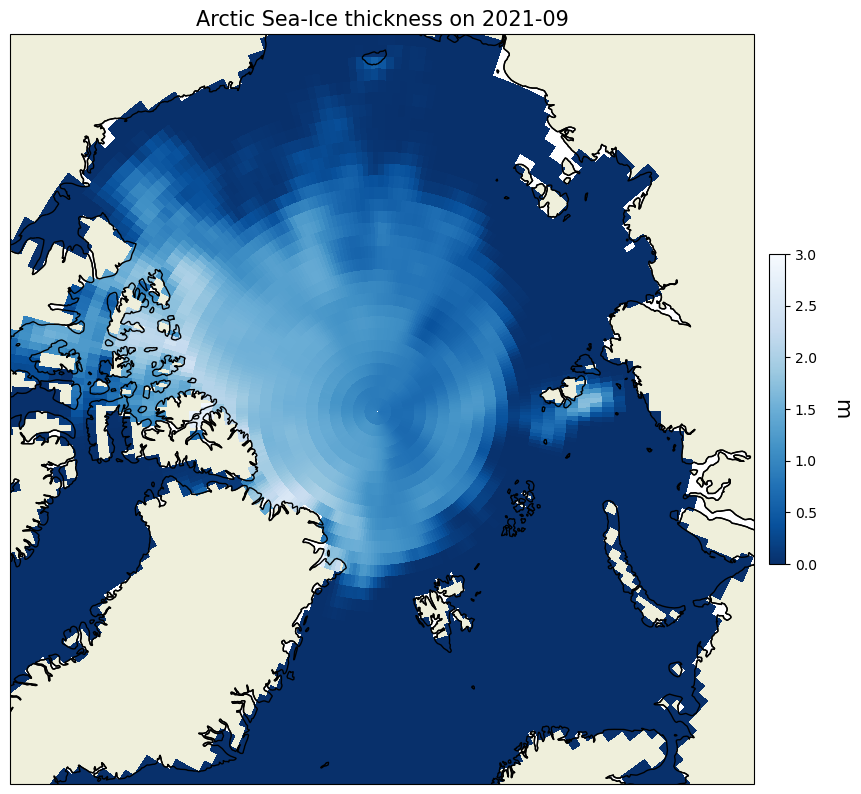

In [41]:
# plotting sea_ice thickness at a  specific dates

# Select the temperature parameter, at the date and depth we want, and store it in a variable.

# Define a date that is available in the product
date_plot='2021-09'
# subsetting the dataset + coarsening
temp_map = ds_si['sithick'].sel(time=date_plot).coarsen(latitude=5, longitude=10, boundary="trim").mean().squeeze()

## DRAWING THE MAP
# Define the caracteristics of the plot
f = plt.figure(figsize=(10,10))                                                   # create a figure and define its size
ax = plt.axes(projection=ccrs.NorthPolarStereo())                                       # create an ax and select the projection of the map
ax.add_feature(cfeature.COASTLINE)        # add the coastlines
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k') # add the coastlines
# gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
# gl.right_labels = False                                                            # remove latitude labels on the right
# gl.top_labels = False                                                              # remove longitude labels on the top
                             # add land mask
ax.set_extent([LON_MIN, LON_MAX, LAT_MIN, LAT_MAX],crs=ccrs.PlateCarree())                             # define the extent of the map [lon_min,lon_max,lat_min,lat_max]

# Plot the sea surface temperature, set the min/max values of the colorbar and the colormap to use
im = ax.pcolor(temp_map['longitude'].data, temp_map['latitude'].data, temp_map, cmap='Blues_r', transform=ccrs.PlateCarree(), vmin=0, vmax=3)
    

# Add the titles and legend
ax.set_title('Arctic Sea-Ice thickness on {}'.format(date_plot),fontsize=15, y=1)              # add a title to the figure
cbar = f.colorbar(im,ax=ax,fraction=0.02, pad=0.02)                                            # add the colorbar
cbar.set_label('m', rotation=270,fontsize=15, labelpad=25)                                    # add the title of the colorbar

# Save figure
#plt.savefig('out/temp_map.png')

# 5. Computing Sea Ice extent trends

[Go back to the "Table of contents"](#Table-of-contents)


In this section, we will go further and process the dataset in order to compute trends of Sea-Ice extent, in order to quantify its evolution in the Arctic over the last 30 years. Monitoring sea ice extent is important because it regulates Earth's climate by reflecting solar radiation and influences ocean circulation.

We will use the variable *"siconc"* to compute the sea-ice extent. The variable gives the fraction of the pixel that covered by sea-ice, so we can estimate the actual surface covered by sea-ice by calculalting the surface area of every pixel and multiplying it by their respective "siconc" values. 

It is important to calculate the surface area of each pixel individually because we are in high latitudes : even though the longitudes and latitudes coordinates of our data are evenly spaced, the actual size of the pixels decreases significantly near the poles because of the spherical shape of the Earth.

We compute the Sea-Ice extent in the next cell.

In [42]:
# PIXEL AREA CALCULATION

# Define the radius of the Earth in meters
R = 6371000  # Mean radius of Earth in meters

lat = ds_si['latitude'].values
lon = ds_si['longitude'].values


# Calculate the differences in lat and lon
dlat = np.radians(np.diff(lat))  # Convert differences to radians
dlon = np.radians(np.diff(lon))  # Convert differences to radians

dlat = np.append(dlat, dlat[0])
dlon = np.append(dlon, dlon[0])   # the delta is constant, adding another to match dims lengths

# Calculate areas using the spherical formula
# Area of each pixel = R^2 * Δlat * Δlon * cos(mid latitude)
area = R**2 * np.abs(dlat[:, np.newaxis] * dlon[np.newaxis, :] * np.cos(np.radians(lat[:, np.newaxis])))

# Create a DataArray for the pixel area
area_da = xr.DataArray(area, dims=('latitude', 'longitude'), coords={'latitude': lat, 'longitude': lon})

# Assign the area DataArray back to the dataset
ds_si['pixel_area'] = area_da

ds_si

<xarray.Dataset> Size: 3GB
Dimensions:     (time: 372, latitude: 321, longitude: 2880)
Coordinates:
  * latitude    (latitude) float64 3kB 50.0 50.12 50.25 ... 89.75 89.88 90.0
  * longitude   (longitude) float64 23kB -180.0 -179.9 -179.8 ... 179.8 179.9
  * time        (time) datetime64[ns] 3kB 1991-01-01 1991-02-01 ... 2021-12-01
Data variables:
    sithick     (time, latitude, longitude) float32 1GB ...
    siconc      (time, latitude, longitude) float32 1GB ...
    pixel_area  (latitude, longitude) float64 7MB 1.242e+08 ... 1.183e-08
Attributes:
    Conventions:               CF-1.4
    field_date:                1991-01-15
    field_type:                Files based on file type nersc_weekly
    history:                   20220830:Created by program hyc2proj, version ...
    institution:               NERSC, Jahnebakken 3, N-5007 Bergen, Norway
    references:                http://topaz.nersc.no
    source:                    NERSC-HYCOM model fields
    title:                     Arctic Ocean Physics Reanalysis
    version:                   v4b
    copernicusmarine_version:  1.2.2

Let's multiply the pixel surface by the sea-ice concentration variable to obtain sea-ice extent :

In [43]:
## Computing sea-ice extent :

ds_si['siext'] = ds_si['pixel_area']*ds_si['siconc']
ds_si

<xarray.Dataset> Size: 6GB
Dimensions:     (time: 372, latitude: 321, longitude: 2880)
Coordinates:
  * latitude    (latitude) float64 3kB 50.0 50.12 50.25 ... 89.75 89.88 90.0
  * longitude   (longitude) float64 23kB -180.0 -179.9 -179.8 ... 179.8 179.9
  * time        (time) datetime64[ns] 3kB 1991-01-01 1991-02-01 ... 2021-12-01
Data variables:
    sithick     (time, latitude, longitude) float32 1GB ...
    siconc      (time, latitude, longitude) float32 1GB ...
    pixel_area  (latitude, longitude) float64 7MB 1.242e+08 ... 1.183e-08
    siext       (latitude, longitude, time) float64 3GB nan nan ... 1.177e-08
Attributes:
    Conventions:               CF-1.4
    field_date:                1991-01-15
    field_type:                Files based on file type nersc_weekly
    history:                   20220830:Created by program hyc2proj, version ...
    institution:               NERSC, Jahnebakken 3, N-5007 Bergen, Norway
    references:                http://topaz.nersc.no
    source:                    NERSC-HYCOM model fields
    title:                     Arctic Ocean Physics Reanalysis
    version:                   v4b
    copernicusmarine_version:  1.2.2

We will now use SciPy to compute the linear trend over the 30 years period we are studying. To remove the seasonal pattern of the data, we can simply resample it to obtain yearly means. For more information about the linear regression method, you can read the [SciPy linregress documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html).

In [44]:
# resampling to yearly means
ds_siext_1Y = ds_si['siext'].resample(time='1Y').mean()

vals1 = (10**-6)*ds_siext_1Y.sum(dim=["longitude", "latitude"],skipna=True).data
dates1 = ds_siext_1Y.time.astype('datetime64')

# computing trends for the sea ice extent values.
slope, intercept, r, p, se = linregress(range(len(vals1)), vals1)

# printing results :
print("Slope : %f\nIntercept : %f\nCorrelation Coef : %f\nP-value : %g\nSlope Std Err : %f" %(slope, intercept, r, p, se))

Slope : -46388.319605
Intercept : 9194417.665512
Correlation Coef : -0.910836
P-value : 1.14872e-12
Slope Std Err : 3903.696848


The trend is decreasing, with a strong inverse correlation coefficient and a p-value almost equal to zero (the P-value here is the probability that the slope is zero). Let's now plot the data along with the trend :

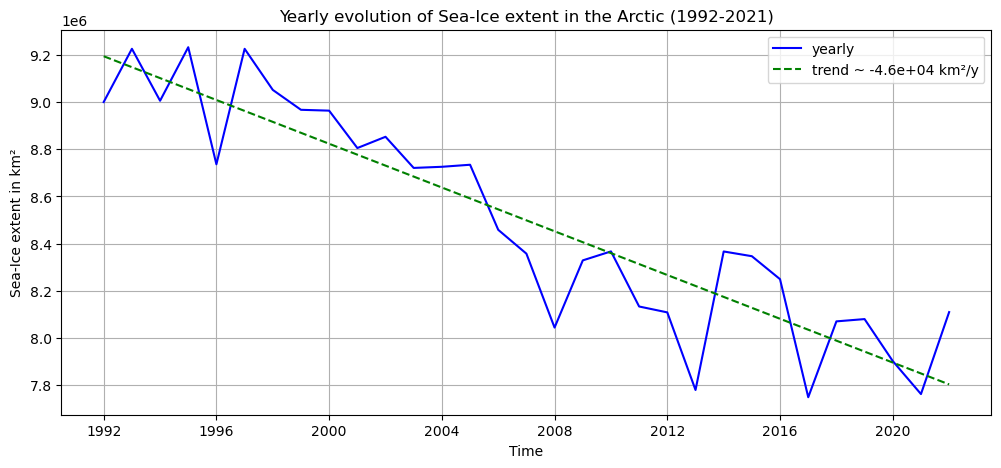

In [45]:
fig, ax = plt.subplots(figsize=(12,5))


trend_vals = np.array(range(len(vals1)))*slope + intercept

ax.plot(dates1, vals1, color='b', label='yearly')
ax.plot(dates1, trend_vals, color='g', linestyle='--', label='trend ~ {:.1e} km²/y'.format(slope))

ax.grid(True)
ax.set_ylabel("Sea-Ice extent in km²")
ax.set_xlabel("Time")
ax.legend()
ax.set_title('Yearly evolution of Sea-Ice extent in the Arctic (1992-2021)');

The decreasing trend is now quite obvious !

To go further, Arctic sea-ice is usually studied when it is at its minimal of maximal extent during a year, i.e. during winter or summer. In the next cells we are going to compute the linear trends over 30 years again, but only for the months of February, and then only for the months of August.

In [46]:
# Computing the February and August datasets

ds_si_02 = ds_si.sel(time=ds_si['time.month'] == 2)
ds_si_08 = ds_si.sel(time=ds_si['time.month'] == 8)

In [47]:
vals1 = (10**-6)*ds_si_02['siext'].sum(dim=["longitude", "latitude"],skipna=True).data
dates1 = ds_si_02.time.astype('datetime64')

slope1, intercept1, r1, p1, se1 = linregress(range(len(vals1)), vals1)

# printing results :
print("Slope : %f\nIntercept : %f\nCorrelation Coef : %f\nP-value : %g\nSlope Std Err : %f" %(slope1, intercept1, r1, p1, se1))

Slope : -24186.583567
Intercept : 11296068.436607
Correlation Coef : -0.816925
P-value : 2.07294e-08
Slope Std Err : 3170.855865


In [48]:
vals2 = (10**-6)*ds_si_08['siext'].sum(dim=["longitude", "latitude"],skipna=True).data
dates2 = ds_si_08.time.astype('datetime64')

slope2, intercept2, r2, p2, se2 = linregress(range(len(vals2)), vals2)

# printing results :
print("Slope : %f\nIntercept : %f\nCorrelation Coef : %f\nP-value : %g\nSlope Std Err : %f" %(slope2, intercept2, r2, p2, se2))

Slope : -66345.215301
Intercept : 5506218.545626
Correlation Coef : -0.855724
P-value : 8.53991e-10
Slope Std Err : 7449.575903


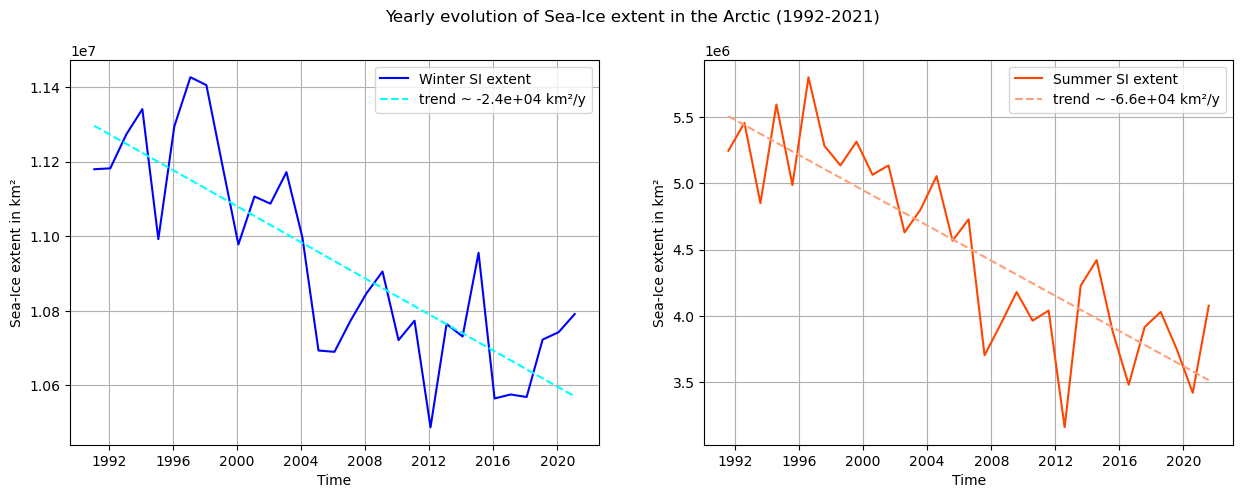

In [49]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,5))

trend_vals1 = np.array(range(len(vals1)))*slope1 + intercept1
trend_vals2 = np.array(range(len(vals2)))*slope2 + intercept2

ax1.plot(dates1, vals1, color='b', label='Winter SI extent')
ax1.plot(dates1, trend_vals1, color='cyan', linestyle='--', label='trend ~ {:.1e} km²/y'.format(slope1))

ax2.plot(dates2, vals2, color='orangered', label='Summer SI extent')
ax2.plot(dates2, trend_vals2, color='lightsalmon', linestyle='--', label='trend ~ {:.1e} km²/y'.format(slope2))

ax1.grid(True)
ax1.set_ylabel("Sea-Ice extent in km²")
ax1.set_xlabel("Time")
ax1.legend()

ax2.grid(True)
ax2.set_ylabel("Sea-Ice extent in km²")
ax2.set_xlabel("Time")
ax2.legend()


plt.suptitle('Yearly evolution of Sea-Ice extent in the Arctic (1992-2021)');

There is a clear difference in terms of melting dynamics between winter and summer. The decreasing of the sea ice extent in summer is almost three times as fast as in winter.

In the next section, we are going to see how those trends a distributed spatially. Are all areas of the Arctic affected the same way by the melting of Sea-Ice ?

# 6. Spatial Trends

[Go back to the "Table of contents"](#Table-of-contents)


This time, we are going to directly at the summer values of the sea-ice extent. We will compute the trends just like we did before, but for *every pixel* of the lon/lat grid of the dataset. Instead of looking at the actual surface area (in square kilometers) we are going to look at the evolution of sea ice cover fraction for each pixel : processing the *siconc* variable is enough for this purpose.

The next cell may take one or two minutes to execute.

In [50]:
trend_array = np.empty((ds_si_08.sizes['latitude'], ds_si_08.sizes['longitude']))

# Loop over each grid point (lat, lon)
for i in range(ds_si_08.sizes['latitude']):
    for j in range(ds_si_08.sizes['longitude']):
        # Extract the time series for the current point (i, j)
        y = ds_si_08['siconc'].data[:, i, j]  # Shape: (time,)
        
        if np.isnan(y).sum()==0 :
            # Perform linear regression for the time series at this point
            slope, intercept, r_value, p_value, std_err = linregress(range(ds_si_08.sizes['time']), y)
        
            # Store the slope (trend) in the trend array
            trend_array[i, j] = slope
        else :
            trend_array[i, j] = np.nan

# Create a new DataArray for the trend, keeping lat/lon coordinates
trend_da = xr.DataArray(trend_array, dims=['latitude', 'longitude'], coords={'latitude': ds_si_08['latitude'], 'longitude': ds_si_08['longitude']})

# Optional: Add the trend DataArray to the original dataset
ds_si_08['trend'] = trend_da

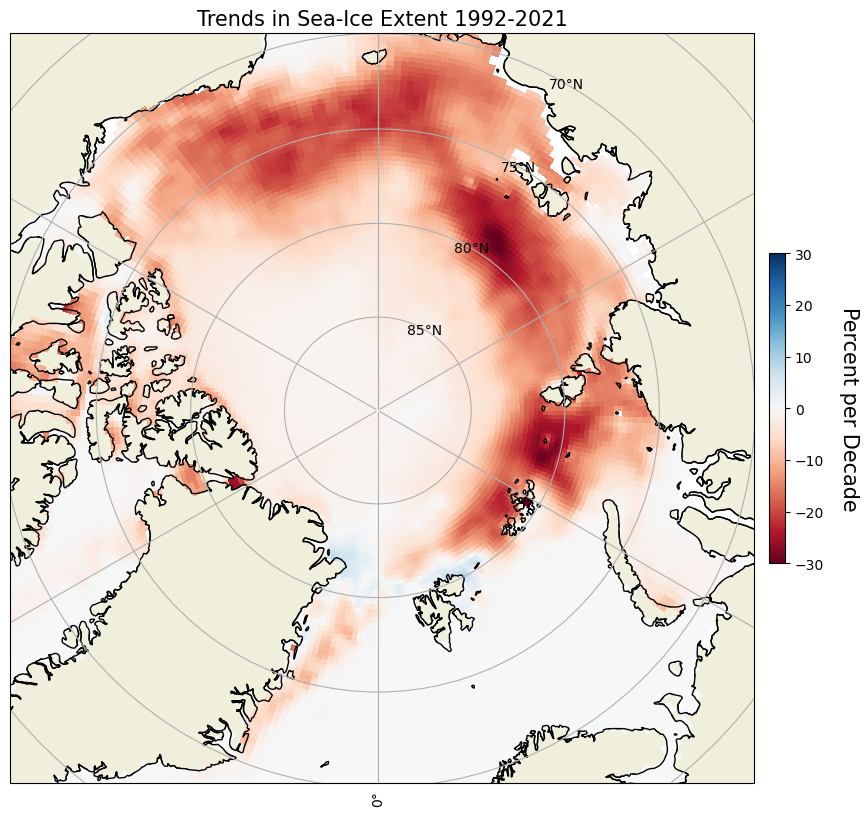

In [51]:
# plotting sea ice extent trends

temp_map = 1000*ds_si_08['trend'].coarsen(latitude=2, longitude=10, boundary="trim").mean().squeeze()

# Define the caracteristics of the plot
f = plt.figure(figsize=(10,10))                                                   # create a figure and define its size
ax = plt.axes(projection=ccrs.NorthPolarStereo())                                       # create an ax and select the projection of the map
ax.add_feature(cfeature.COASTLINE)        # add the coastlines
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k') # add the coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
                             # add land mask
ax.set_extent([LON_MIN, LON_MAX, LAT_MIN, LAT_MAX],crs=ccrs.PlateCarree())                             # define the extent of the map [lon_min,lon_max,lat_min,lat_max]

# Plot the sea surface temperature, set the min/max values of the colorbar and the colormap to use
im = ax.pcolor(temp_map['longitude'].data, temp_map['latitude'].data, temp_map, cmap='RdBu', transform=ccrs.PlateCarree(), vmin=-30, vmax=30)
    

# Add the titles and legend
ax.set_title('Trends in Sea-Ice Extent 1992-2021',fontsize=15, y=1)              # add a title to the figure
cbar = f.colorbar(im,ax=ax,fraction=0.02, pad=0.02)                                            # add the colorbar
cbar.set_label('Percent per Decade', rotation=270,fontsize=15, labelpad=25)                                    # add the title of the colorbar

# Save figure
#plt.savefig('out/temp_map.png')

We can see that some areas are more severely affected than others by the loss of sea-ice. That is especially the case at lower latitudes, around the Severnaya Zemlya and Anzhu archipelagos.
On the contrary, there appear to be slightly increasing trends in Sea-Ice extent between Greenland and Svalbard.


# 7. Correlations with temperatures

[Go back to the "Table of contents"](#Table-of-contents)


One the commonly known main drivers of Sea-Ice melting is the rise of temperatures, which tend to rise more rapidly near the poles. In this section we examine the correlation between Sea-Ice Extent and Sea Surface Temperatures.

In [52]:
# Loading the temperature data
ds_t = xr.open_dataset('data/CMEMS_Arctic_Reanalysis_1991-2021_TEMP.nc')
ds_t

<xarray.Dataset> Size: 22GB
Dimensions:    (depth: 16, latitude: 321, longitude: 2880, time: 372)
Coordinates:
  * depth      (depth) float32 64B 0.0 2.0 4.0 6.0 10.0 ... 70.0 80.0 90.0 100.0
  * latitude   (latitude) float64 3kB 50.0 50.12 50.25 ... 89.75 89.88 90.0
  * longitude  (longitude) float64 23kB -180.0 -179.9 -179.8 ... 179.8 179.9
  * time       (time) datetime64[ns] 3kB 1991-01-01 1991-02-01 ... 2021-12-01
Data variables:
    thetao     (time, depth, latitude, longitude) float32 22GB ...
Attributes:
    Conventions:               CF-1.4
    field_date:                1991-01-15
    field_type:                Files based on file type nersc_weekly
    history:                   20220830:Created by program hyc2proj, version ...
    institution:               NERSC, Jahnebakken 3, N-5007 Bergen, Norway
    references:                http://topaz.nersc.no
    source:                    NERSC-HYCOM model fields
    title:                     Arctic Ocean Physics Reanalysis
    version:                   v4b
    copernicusmarine_version:  1.2.2

In [53]:
# selecting only the surface temperature
ds_si_temp_ts = ds_t.thetao.sel(depth=0).mean(dim=['latitude', 'longitude'])

# averaging the dataset spatially to compute the timeseries
ds_si_siext_ts = (10**-12)*ds_si.siext.sum(dim=['latitude', 'longitude'])

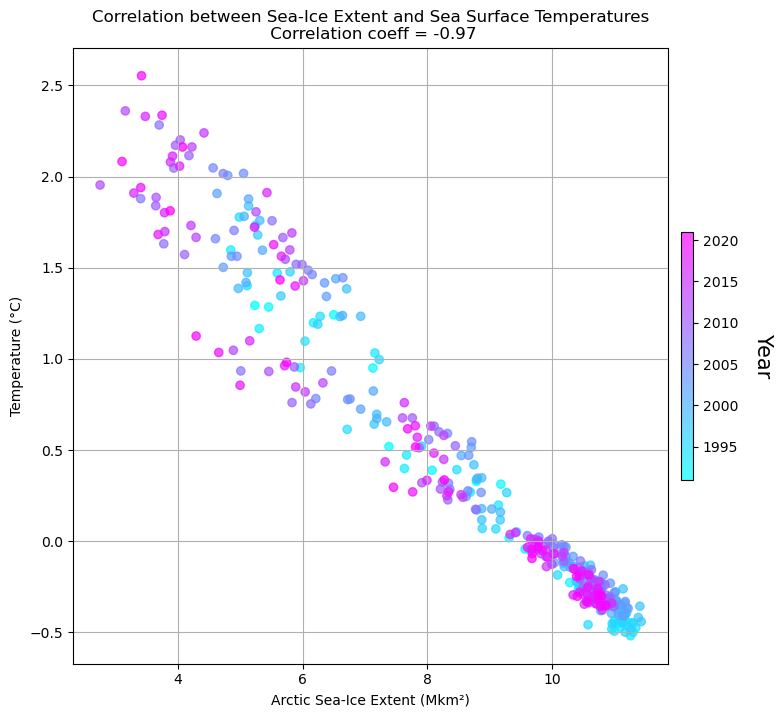

In [54]:
#drawing scatter plot

fig, ax = plt.subplots(figsize=(8,8))

# colors = ['blue', 'dodgerblue', 'mediumturquoise', 'mediumspringgreen', 'limegreen', 'gold', 'darkorange', 'orangered', 'red', 'crimson', 'mediumvioletred', 'blueviolet']
# cmap = ListedColormap(colors)
cmap = 'cool'
# labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
scatter = ax.scatter(ds_si_siext_ts.data, ds_si_temp_ts.data, c=ds_si_siext_ts['time.year'], cmap=cmap, alpha=0.7)

ax.grid(True)

# patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(colors))]
# ax.legend(handles=patches, title='Months')

res = pearsonr(ds_si_siext_ts.data, ds_si_temp_ts.data)
ax.set_title("Correlation between Sea-Ice Extent and Sea Surface Temperatures\n Correlation coeff = {:.2f}".format(res[0]))

ax.set_ylabel('Temperature (°C)')
ax.set_xlabel('Arctic Sea-Ice Extent (Mkm²)')

cbar = f.colorbar(scatter,ax=ax,fraction=0.02, pad=0.02)                                            # add the colorbar
cbar.set_label('Year', rotation=270,fontsize=15, labelpad=25) 

the first thing we observe is that there is a very strong inverse correlation (the coefficient is very close to -1) between temperature and sea-ice extent : when the temperature is high, the sea-ice extent is low, and vice versa, which was expected.
We also notice that the lowest temperatures and largest extents mostly belong to years close to 1991, and on the contrary, the highest temperatures and smallest extents are dominated by years closer to 2021. This also highlights the gradual melting of the Sea-Ice. 

# 8. Ocean Heat Content

[Go back to the "Table of contents"](#Table-of-contents)


In this section, we look at one of the consequences of the melting of sea-ice. As sea ice diminishes, the darker ocean surface is exposed, absorbing more solar radiation instead of reflecting it, a process known as the **albedo effect**. This increased absorption leads to a rise in ocean temperatures, which further accelerates ice melt in a feedback loop. The warmer ocean also affects heat distribution in global ocean currents, altering circulation patterns and potentially influencing weather and climate systems worldwide. Additionally, the loss of insulating sea ice allows more heat to escape from the ocean into the atmosphere, amplifying Arctic warming and contributing to broader climate change impacts.

Our temperature dataset provides data for several layers under the surface of the ocean. We will highlight the penetration of the temperature within those deeper layers.

In [55]:
# reminder of the used dataset
ds_t

<xarray.Dataset> Size: 22GB
Dimensions:    (depth: 16, latitude: 321, longitude: 2880, time: 372)
Coordinates:
  * depth      (depth) float32 64B 0.0 2.0 4.0 6.0 10.0 ... 70.0 80.0 90.0 100.0
  * latitude   (latitude) float64 3kB 50.0 50.12 50.25 ... 89.75 89.88 90.0
  * longitude  (longitude) float64 23kB -180.0 -179.9 -179.8 ... 179.8 179.9
  * time       (time) datetime64[ns] 3kB 1991-01-01 1991-02-01 ... 2021-12-01
Data variables:
    thetao     (time, depth, latitude, longitude) float32 22GB ...
Attributes:
    Conventions:               CF-1.4
    field_date:                1991-01-15
    field_type:                Files based on file type nersc_weekly
    history:                   20220830:Created by program hyc2proj, version ...
    institution:               NERSC, Jahnebakken 3, N-5007 Bergen, Norway
    references:                http://topaz.nersc.no
    source:                    NERSC-HYCOM model fields
    title:                     Arctic Ocean Physics Reanalysis
    version:                   v4b
    copernicusmarine_version:  1.2.2

We are going to analyse a slice of the ocean, in order to be able visualize deeper layers. This will result in a heat profil plotted along two axes : depth and longitude. 
We therefore need to choose a fixed latitude to perform the analysis.

In [56]:
# defining slice

lon_min = 130
lon_max = 160
lat_fixed = 78

ds_t_sub_slice = ds_t.sel(latitude = lat_fixed, method='nearest').sel(longitude=slice(lon_min,lon_max))

In [57]:
ds_t_sub = ds_t.sel(latitude = slice(75,82)).sel(longitude=slice(130,160))
lat_test = 78
ds_t_sub_slice = ds_t_sub.sel(latitude = lat_test, method='nearest')

In [58]:
ds_t_sub_slice

<xarray.Dataset> Size: 6MB
Dimensions:    (depth: 16, longitude: 241, time: 372)
Coordinates:
  * depth      (depth) float32 64B 0.0 2.0 4.0 6.0 10.0 ... 70.0 80.0 90.0 100.0
    latitude   float64 8B 78.0
  * longitude  (longitude) float64 2kB 130.0 130.1 130.2 ... 159.8 159.9 160.0
  * time       (time) datetime64[ns] 3kB 1991-01-01 1991-02-01 ... 2021-12-01
Data variables:
    thetao     (time, depth, longitude) float32 6MB ...
Attributes:
    Conventions:               CF-1.4
    field_date:                1991-01-15
    field_type:                Files based on file type nersc_weekly
    history:                   20220830:Created by program hyc2proj, version ...
    institution:               NERSC, Jahnebakken 3, N-5007 Bergen, Norway
    references:                http://topaz.nersc.no
    source:                    NERSC-HYCOM model fields
    title:                     Arctic Ocean Physics Reanalysis
    version:                   v4b
    copernicusmarine_version:  1.2.2

In [59]:
# Computing the slice line :
lons = ds_t_sub_slice.longitude.data
lat = ds_t_sub_slice.latitude.data

# lons is an array, lat is a single value
lats = np.ones(len(lons))*lat

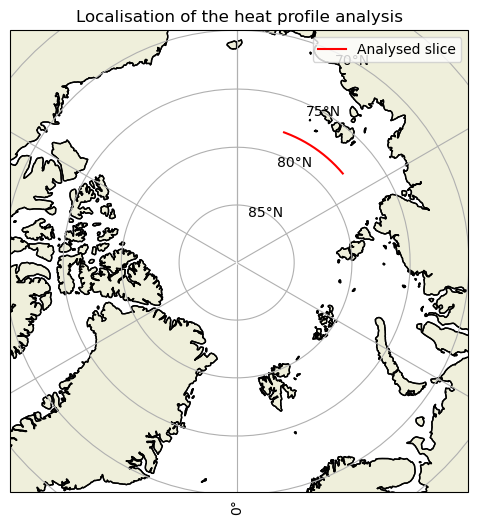

In [60]:
# showing the slice on a map :

# Define the caracteristics of the plot
f = plt.figure(figsize=(6,6))                                                   # create a figure and define its size
ax = plt.axes(projection=ccrs.NorthPolarStereo())                                       # create an ax and select the projection of the map
ax.add_feature(cfeature.COASTLINE)        # add the coastlines
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k') # add the coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
                             # add land mask
ax.set_extent([LON_MIN, LON_MAX, LAT_MIN, LAT_MAX],crs=ccrs.PlateCarree())                             # define the extent of the map [lon_min,lon_max,lat_min,lat_max]

ax.plot(lons, lats, transform=ccrs.PlateCarree(), color='r', label='Analysed slice')
ax.legend()
ax.set_title('Localisation of the heat profile analysis');

If your remember our results concerning the spatial trends, this area was particularly affected by sea-ice, we may get significant results from the next analysis.

First, let's plot the heat profil at a recent date :

Text(0, 0.5, 'Depth (m)')

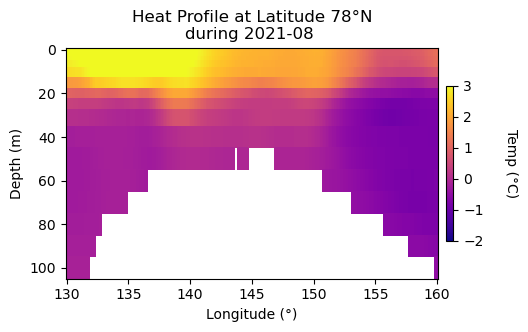

In [61]:
# plotting heat profile
fig, ax = plt.subplots(figsize=(5,3))

# choosing a date
date_plot = '2021-08'
temp_prof = ds_t_sub_slice.thetao.sel(time=date_plot).squeeze()

im = ax.pcolor(temp_prof.longitude, temp_prof.depth, temp_prof, cmap='plasma', vmin=-2, vmax =3)
plt.gca().invert_yaxis()

cbar = fig.colorbar(im,ax=ax,fraction=0.02, pad=0.02)                                            # add the colorbar
cbar.set_label('Temp (°C)', rotation=270,fontsize=10, labelpad=25)
ax.set_title('Heat Profile at Latitude %d°N\nduring %s '%(lat_test,date_plot))
ax.set_xlabel('Longitude (°)')
ax.set_ylabel('Depth (m)')

We can see that we have quite a visible temperature gradient, with high temperatures at the surface. We're now going to create an animation to see if there has been an evolution of this gradient over the last 30 years. to do this, we're going to plot this graph 30 times (August of every year from 1991 to 2021) and gather them all to create a GIF image.

All the graphs are saved in the folder `out/`

In [62]:
#Plotting one graph per year
for c, y in enumerate(np.unique(ds_t_sub_slice.time.dt.year)) :
    
    fig, ax = plt.subplots(figsize=(5,3))
    date_plot = '%d-08' % y
    temp_prof = ds_t_sub_slice.thetao.sel(time=date_plot).squeeze()
    
    gauge_string = ["-"]*len(np.unique(ds_t_sub_slice.time.dt.year))
    gauge_string[c] = ">"
    gauge_string = "".join(gauge_string)

    im = ax.pcolor(temp_prof.longitude, temp_prof.depth, temp_prof, cmap='plasma', vmin=-2, vmax =3)
    plt.gca().invert_yaxis()

    cbar = fig.colorbar(im,ax=ax,fraction=0.02, pad=0.02)                                            # add the colorbar
    cbar.set_label('Temp (°C)', rotation=270,fontsize=10, labelpad=25)
    ax.set_title('Heat Profile at Latitude %d°N\nduring %s \n%s'%(lat_test,date_plot, gauge_string))
    ax.set_xlabel('Longitude (°)')
    ax.set_ylabel('Depth (m)')
    
    plt.tight_layout()
    plt.savefig('out/heat_prof_%s.png' % date_plot)
    plt.close()
    

In [63]:
# Import the modules for the animation
from PIL import Image 
from pathlib import Path
from IPython.display import display, HTML

In [64]:
# Search image files
image_path = Path('out/')
images = sorted(image_path.glob('heat_prof_*.png'))

# Load the images
images_files = [Image.open(file) for file in images]

# Save as a GIF
images_files[0].save(
    'out/animated_heat_prof.gif', 
    save_all=True, 
    append_images=images_files[1:], 
    duration=500,  # Duration between frames in milliseconds
    loop=10         
)

In [65]:
# Visualisation
display(HTML('<img src="out/animated_heat_prof.gif" width="800"/>')) 

We can see that, as we progress through time, the summers for which there is a deep penetration of the heat through the ocean are more and more frequent. This indicates that this area is less frequently covered by ice during the Summer.

The deep penetration of heat in the Arctic Ocean, once sea ice is lost, accelerates ocean warming and delays ice formation, reinforcing a positive feedback loop. This disrupts ocean stratification and circulation, potentially impacting global climate systems. Additionally, it alters Arctic ecosystems and may release stored methane, exacerbating climate change.

You have reached the end of this tutorial. Now here are a few exercises to complete the training!


# 9. Exercises

[Go back to the "Table of contents"](#Table-of-contents)


<div class="alert alert-block alert-info">  
 

Here is a set of exercises we propose for you to go further into the analysis. There are 2 levels depending on how much Python code you need to write to answer the questions. If you need help, do not hesitate to contact the service desk: **[servicedesk.cmems@mercator-ocean.eu](servicedesk.cmems@mercator-ocean.eu)**!

**Beginners** :

- In [Section 4.2](#4.2-Drawing-your-first-map) we have plotted a map of the Sea-Ice Thickness on a specific date. Try to plot other dates or other variables to observe the dynamics of Sea-Ice in the area!
    
- In [Section 5](#5.-Computing-Sea-Ice-extent-trends), we computed sea-ice extent trends, you can try to do the same for the ice thickness. Do you think you will get the same results ?

**Intermediate** :

- In [Section 7](#7.-Correlations-with-temperatures), we visualised the correlation of the sea-ice loss with seawater temperatures. Try to look at the correlation with salinity to see if you oberserve a similar pattern. You may have to use the ToolBox to download the salinity dataset.

- In [Section 8](#8.-Ocean-Heat-Content), try visualizing another slice by changing the coordinates. You can even switch the constant latitude for a constant longitude!
    
</div> 

# 10. Conclusion

[Go back to the "Table of contents"](#Table-of-contents)


In this notebook, you learned to access CMEMS data through the Copernicus Marine Service ToolBox, and to explore it. You then learned to compute linear trends across spatially averaged timeseries and individual pixels. You also learned to visualize correlations between datasets, and finally you plotted heat profiles accross a chosen slice of the Arctic Ocean.

<div class="alert alert-block alert-success">
    <b>Congratulations !!</b><br>

And thank you for your attention! :) 
    
    
We hope you enjoyed this Jupyter Notebook training on the Arctic.

You now have plenty of tools to analyse sea-ice variables, compute trends and draw graphs. Feel free to re-use and adapt all the Python scripts of this notebook to your needs ! 

This training course is over but we'd love to hear from you about how we could improve it (topics, tools, storytelling, format, speed etc). If you have any question, do not hesitate to contact us at [servicedesk.cmems@mercator-ocean.eu](servicedesk.cmems@mercator-ocean.eu) !